In [1]:
import pandas as pd
import preprocess
import numpy as np

# Read in labeled stock sentiment data
data = pd.read_csv('train/stock_data.csv')

# Preprocess tweets for NLP analysis
data = preprocess.Preprocess_Tweets(data)
display(data)

C:\Users\Sumukha\AppData\Roaming\Python\Python38\site-packages\pandas\core\strings\object_array.py:158: FutureWarning: Possible nested set at position 1
  pat = re.compile(pat, flags=flags)


,Text,Sentiment,Text_Cleaned
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...
3,MNTA Over 12.00,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37
...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said discoms are likely to s...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,gold prices slip below rs 46000 as investors b...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex off day’s high up 600 ...


In [2]:
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Prepare Vader sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Predict sentiment with Vader classifier
data['Vader_Scores'] = data['Text_Cleaned'].apply(lambda score: sid.polarity_scores(score)['compound'])
data['Vader_Prediction'] = data['Vader_Scores'].apply(lambda score: 1 if score >=0 else -1)

# Print Vader sentiment accuracy
print('Vader Accuracy:', round((len(data[data['Sentiment']==data['Vader_Prediction']])/len(data)) *100, 2), '%', '\n')

Vader Accuracy: 66.47 % 



In [3]:
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords

# Create list of custom stop words to remove
StopWords = set([s.replace("'", '') for s in stopwords.words('english') if s not in ['not', 'up', 'down', 'above', 'below', 'under', 'over']])
print(StopWords)

# Remove stop words for tweets
data['Text_Processed'] = data['Text_Cleaned'].apply(lambda s: " ".join([word for word in s.split() if word not in StopWords]))
data['Text_Processed'] = data['Text_Processed'].str.strip()

display(data)

{'just', 'his', 'did', 'on', 'isnt', 'no', 'about', 'off', 'isn', 'very', 'm', 'doesn', 'our', 'yourselves', 'if', 'this', 'there', 're', 've', 'your', 'after', 'which', 'before', 'only', 'haven', 'being', 'during', 'don', 'doing', 'didn', 'same', 'hers', 'mightnt', 'youd', 'shes', 'wouldnt', 'these', 'wasnt', 'do', 'a', 'as', 'youre', 'shouldve', 'the', 'ourselves', 'dont', 'hasnt', 'to', 'other', 'shouldnt', 'were', 'while', 'from', 'who', 'needn', 'my', 'she', 'nor', 'those', 'couldnt', 'y', 'their', 'is', 'through', 'having', 'theirs', 'hasn', 'arent', 'by', 'at', 'weren', 'in', 'shouldn', 'will', 'yours', 'why', 'because', 'ours', 's', 'most', 'me', 'thatll', 'can', 'that', 'hadn', 'was', 'her', 'couldn', 'more', 'itself', 't', 'or', 'such', 'both', 'has', 'have', 'werent', 'wasn', 'wouldn', 'than', 'each', 'had', 'myself', 'out', 'himself', 'been', 'd', 'mustnt', 'wont', 'now', 'he', 'hadnt', 'herself', 'i', 'should', 'o', 'whom', 'again', 'havent', 'mightn', 'it', 'ain', 'mustn'

,Text,Sentiment,Text_Cleaned,Vader_Scores,Vader_Prediction,Text_Processed
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,kickers on my watchlist xide tit soq pnk cpw b...,0.0000,1,kickers watchlist xide tit soq pnk cpw bpz aj ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,aap movie 55 percent return for the fea and ge...,0.6249,1,aap movie 55 percent return fea geed indicator...
2,user I'd be afraid to short AMZN - they are lo...,1,id be afraid to short amzn to they are looking...,0.3612,1,id afraid short amzn looking like near monopol...
3,MNTA Over 12.00,1,mnta over 12.00,0.0000,1,mnta over 12.00
4,OI Over 21.37,1,oi over 21.37,0.0000,1,oi over 21.37
...,...,...,...,...,...,...
5786,Industry body CII said #discoms are likely to ...,-1,industry body cii said discoms are likely to s...,-0.7003,-1,industry body cii said discoms likely suffer n...
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1,gold prices slip below rs 46000 as investors b...,-0.4019,-1,gold prices slip below rs 46000 investors book...
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1,workers at bajaj auto have agreed to a 10 perc...,0.0000,1,workers bajaj auto agreed 10 percent wage cut ...
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1,sharemarket live sensex off day’s high up 600 ...,0.4019,1,sharemarket live sensex day’s high up 600 poin...


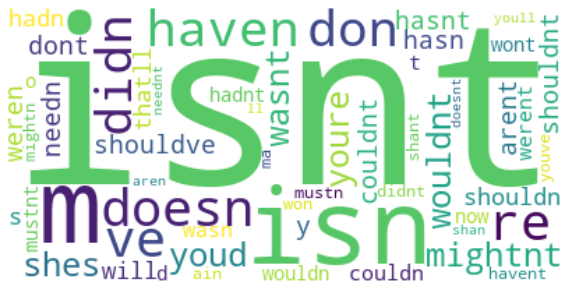

In [4]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.figure(figsize= (10,10))

#set the parameters for the wordcloud
wc= WordCloud(background_color= 'white', contour_width= 2, contour_color= 'green', max_words= 2000, max_font_size= 256, random_state= 42)

#generate wordcloud based on data from 'StopWords'
wc.generate(" ".join(StopWords))

plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# Split data into 80/20 train-test split
train_pct = .8
np.random.seed(1)
idx = np.random.permutation(len(data))

X_train = data['Text_Processed'].values[idx[:int(train_pct*len(data))]]
y_train = data['Sentiment'].values[idx[:int(train_pct*len(data))]]

#Setting -1 values to 0 before applying ML models
y_train[y_train==-1] = 0
X_test = data['Text_Processed'].values[idx[int(train_pct*len(data)):]]
y_test = data['Sentiment'].values[idx[int(train_pct*len(data)):]]
y_test[y_test==-1] = 0


#### using MultinomialNB algorithm

Best alpha:  1.0   |  Best Score:  83.05


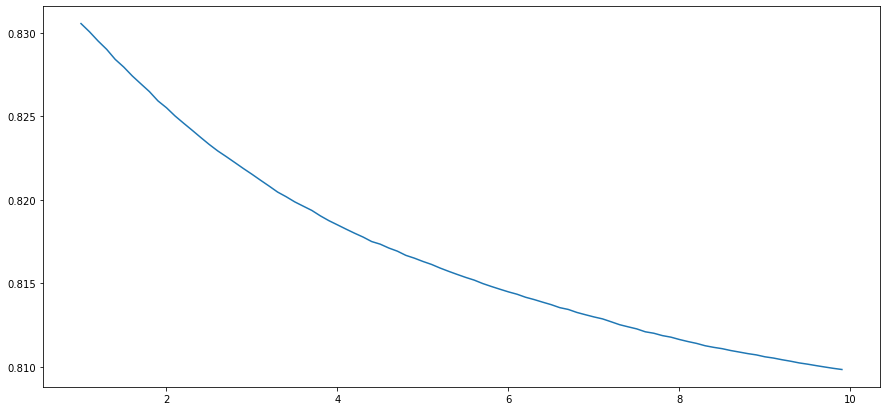

Naive-Bayes Accuracy: 66.7 %


In [44]:
# Calculate TF-IDF for Naive Bayes classification
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)

# Get TF-IDF for Train and Test data
X_train_tfidf = tf_idf.fit_transform(X_train)
X_test_tfidf = tf_idf.transform(X_test)


# Define function to determine accuracy of model
def get_auc_CV(model):
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

# Initialize models with multiple alpha values to find best model
alphas = np.arange(1,10,0.1)
models = [MultinomialNB(alpha=i) for i in alphas]

# Find best performing model
accs = []
for model in models:
    accs.append(get_auc_CV(model))
    
accs = np.array(accs)

# Get best performing alpha value to continue with
best_alpha = round(alphas[accs.argmax()], 1)

# Print best alpha value and accuracy
print('Best alpha: ', best_alpha, '  |  Best Score: ', round(accs.max()*100, 2))

# Plot accuracies per alpha values
plt.figure(figsize=(15,7))
plt.plot(alphas, accs)
plt.show()

# Retrain best performing model
best_model = MultinomialNB(alpha=best_alpha)
best_model.fit(X_train_tfidf, y_train)

# Predict test data with best model
probs = best_model.predict_proba(X_test_tfidf)

# Print accuracy of best performing model on tweet sentiment analysis 
model1= round(len(np.where(y_test == probs.argmax(axis=1))[0])/len(probs) * 100, 2)
print('Naive-Bayes Accuracy:', round(model1, 2), '%')

#### Other classification algorithms

In [40]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(max_depth= 2, criterion='gini', random_state= 0)
RFC.fit(X_train_tfidf, y_train)
RFCPredict= RFC.predict_proba(X_test_tfidf)
model2= round(len(np.where(y_test == RFCPredict.argmax(axis=1))[0])/len(RFCPredict) * 100, 2)
print('RandomForestClassifier Accuracy:', model2, '%')

RandomForestClassifier Accuracy: 61.26 %


In [41]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression(random_state= 0)
LR.fit(X_train_tfidf, y_train)
LRPredict= LR.predict_proba(X_test_tfidf)
model3= round(len(np.where(y_test == LRPredict.argmax(axis=1))[0])/len(LRPredict) * 100, 2)
print('Logistic Regression Accuracy:', model3, '%')

Logistic Regression Accuracy: 74.12 %


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model_svm= SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train_tfidf, y_train)
SVMPredict= model_svm.predict(X_test_tfidf)
model4= accuracy_score(y_test, SVMPredict)*100
print('SVM Accuracy: {:.2f} %'.format(model4))

SVM Accuracy: 78.86 %


In [30]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, SVMPredict)
print("Confusion matrix:\n", cm)
print("\n\nClassification Report:\n", classification_report(y_test, SVMPredict))

Confusion matrix:
 [[285 164]
 [ 81 629]]


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70       449
           1       0.79      0.89      0.84       710

    accuracy                           0.79      1159
   macro avg       0.79      0.76      0.77      1159
weighted avg       0.79      0.79      0.78      1159



In [43]:
from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion= 'gini', max_depth=2, random_state= 0)
DTC.fit(X_train_tfidf, y_train)
DTCPredict= DTC.predict(X_test_tfidf)
model5= accuracy_score(y_test, DTCPredict)*100
print('Decision Tree Classifier Accuracy: {:.2f} %'.format(model5))

Decision Tree Classifier Accuracy: 68.25 %


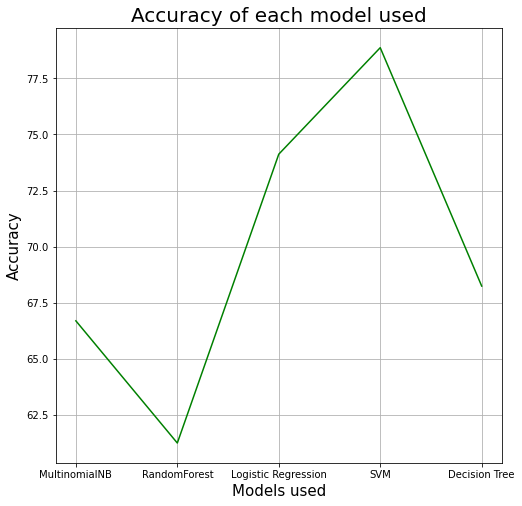

In [46]:
import matplotlib.pyplot as plt
x= ['MultinomialNB', 'RandomForest', 'Logistic Regression', 'SVM', 'Decision Tree']
y= [model1, model2, model3, model4, model5]
plt.figure(figsize= (8, 8))
plt.plot(x, y, color= 'green')
plt.xlabel("Models used", fontsize= 15)
plt.ylabel("Accuracy", fontsize= 15)
plt.title("Accuracy of each model used", fontsize= 20)
plt.grid()